In [ ]:
# !pip install earthengine-api
# !pip install geemap
# !pip install geopandas requests rasterio earthpy

In [ ]:
import ee
# ee.Authenticate()
# Initialize the Earth Engine API

# ee.Initialize(project='thakur-clm')
# !pip install google-api-python-client google-auth-httplib2 google-auth-oauthlib


In [30]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [82]:
import ee
import geemap
import os

# Initialize the Earth Engine API
# ee.Initialize()

# Define the region of interest (South Korea bounding box)
korea = ee.Geometry.Rectangle([123.5, 40.0, 150.0, 50])

# Load the SRTM data (Shuttle Radar Topography Mission 1 arc-second data)
srtm = ee.Image("USGS/SRTMGL1_003")

# Clip the SRTM data to the South Korea boundary
clipped_srtm = srtm.clip(korea)

# Define a file path for the output (you can change this path as needed)
output_file = 'clipped_srtm_korea.tif'

# Define the export parameters
export_task = ee.batch.Export.image.toDrive(
    image=clipped_srtm,
    description='export_srtm_korea',
    fileFormat='GeoTIFF',
    region=korea,
    scale=30,  # SRTM data has a resolution of 30 meters
    maxPixels=1e8  # Maximum pixels to export
)
# Start the export task
export_task.start()

# Monitor the task status
print("Exporting data to Google Drive. Please wait...")

# Wait for the task to complete
import time
while export_task.active():
    print('Waiting for the export to complete...')
    time.sleep(10)

print("Export finished! Check your Google Drive for the file.")

print(f"DEM file downloaded to: {os.path.abspath(output_file)}")




Exporting data to Google Drive. Please wait...
Waiting for the export to complete...
Export finished! Check your Google Drive for the file.
DEM file downloaded to: /content/clipped_srtm_korea.tif


In [ ]:
#each tile extracton
import ee
import geemap
import os

# Authenticate and initialize Google Earth Engine
# ee.Authenticate()
# ee.Initialize()

# Load the SRTM DEM dataset (1 arc-second, ~30m resolution)
srtm = ee.Image("USGS/SRTMGL1_003")

# Define the region of interest (South Korea boundary coordinates)
roi = ee.Geometry.Polygon([
    [[124.5, 33], [131.0, 33], [131.0, 38], [124.5, 38]]
])

# Clip the DEM to the region of interest (South Korea)
dem_korea = srtm.clip(roi)

# Tile size in degrees (0.5 degrees by 0.5 degrees)
tile_size = 0.5  # This controls the size of each tile (in degrees)
lat_min, lat_max = 33, 38
lon_min, lon_max = 124.5, 131.0

# Start a loop over the latitudes and longitudes using floating-point steps
lat = lat_min
while lat < lat_max:
    lon = lon_min
    while lon < lon_max:
        # Define the tile region for export
        tile_roi = ee.Geometry.Polygon([
            [[lon, lat], [lon + tile_size, lat], [lon + tile_size, lat + tile_size], [lon, lat + tile_size]]
        ])

        # Set the output file path for each tile
        output_tile_path = f"/content/South_Korea_DEM_tile_{lat:.2f}_{lon:.2f}.tif"

        # Export each tile to local disk
        geemap.ee_export_image(dem_korea.clip(tile_roi), filename=output_tile_path, region=tile_roi, scale=90)

        print(f"Exporting tile: {output_tile_path}")

        # Move to the next longitude
        lon += tile_size

    # Move to the next latitude
    lat += tile_size

print("Exporting tiles completed.")


In [83]:
import ee
import geemap
import os

# Authenticate and initialize Google Earth Engine
ee.Authenticate()
ee.Initialize()

# Define the region of interest (South Korea boundary coordinates)
roi = ee.Geometry.Polygon([
    [[122.5, 33], [135.0, 33], [135.0, 50], [122.5, 50]] # need to adjust size Top-left corner: Top-right corner: Bottom-right corner: Bottom-left corner
])

# Load the SRTM DEM dataset (1 arc-second, ~30m resolution)
srtm = ee.Image("USGS/SRTMGL1_003")

# Clip the DEM to the region of interest (South Korea)
dem_korea = srtm.clip(roi)

# Specify the output path for the DEM file
output_path = "/content/South_Korea_DEM_1200m.tif"

# Export DEM to local disk with reduced resolution (90m instead of 30m)
geemap.ee_export_image(dem_korea, filename=output_path, region=roi, scale=1200)  # resize the ale

print(f"DEM file downloaded to: {os.path.abspath(output_path)}")


Generating URL ...
Please wait ...
Data downloaded to /content/South_Korea_DEM_1200m.tif
DEM file downloaded to: /content/South_Korea_DEM_1200m.tif


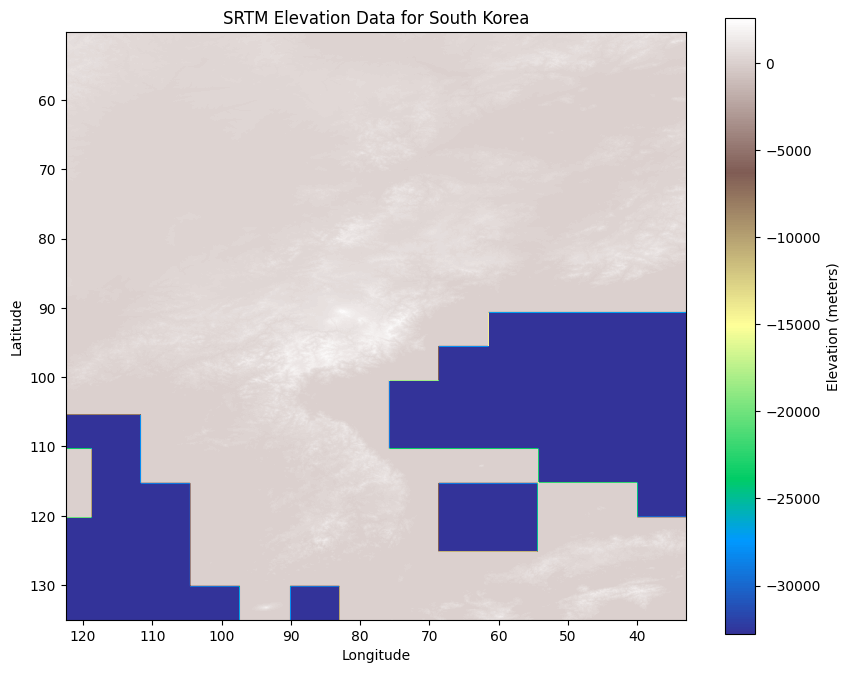

In [85]:
import rasterio
import matplotlib.pyplot as plt

# Path to the downloaded GeoTIFF file
output_file = '/content/South_Korea_DEM_1200m.tif'

# Open the downloaded TIFF file
with rasterio.open(output_file) as src:
    # Read the raster data
    data = src.read(1)  # Reading the first band (elevation data)

    # Get the metadata of the raster file
    meta = src.meta

    # Plotting the raster data using matplotlib
    plt.figure(figsize=(10, 8))
    plt.imshow(data, cmap='terrain', extent=src.bounds)
    plt.colorbar(label="Elevation (meters)")
    plt.title('SRTM Elevation Data for South Korea')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()


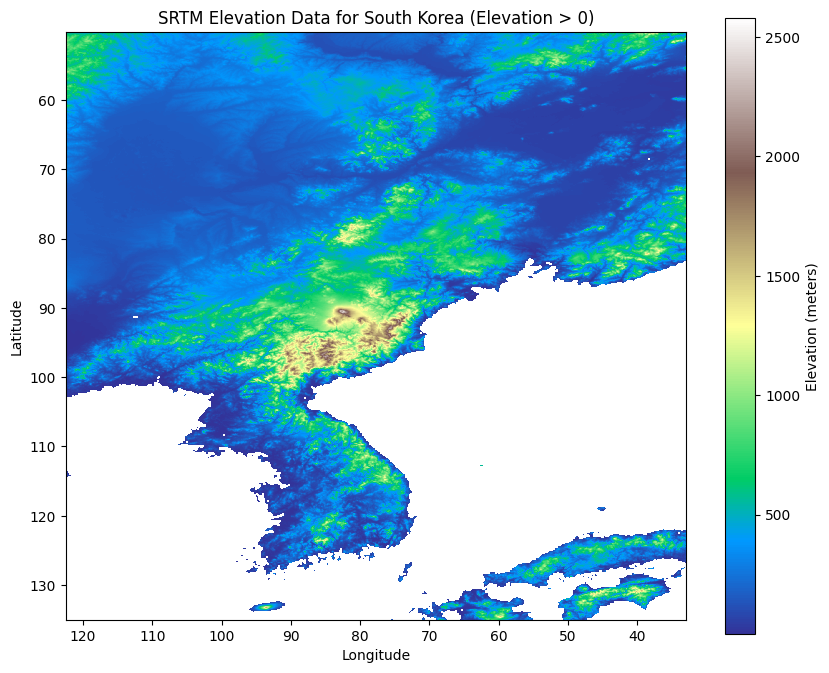

In [86]:
# Plotting grater than zero

# Open the downloaded GeoTIFF file
with rasterio.open(output_file) as src:
    # Read the raster data and convert to float
    data = src.read(1).astype(float)  # Convert data to float for NaN masking

    # Mask the data: Set values <= 0 to NaN (Not a Number)
    data[data <= 0] = np.nan  # Mask out areas with elevation <= 0

    # Get the metadata of the raster file
    meta = src.meta

    # Plotting the raster data using matplotlib
    plt.figure(figsize=(10, 8))
    plt.imshow(data, cmap='terrain', extent=src.bounds)
    plt.colorbar(label="Elevation (meters)")
    plt.title('SRTM Elevation Data for South Korea (Elevation > 0)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()
